In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("medical_cost_insurance.csv") #loading dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape  # reading the shape of data

(1338, 7)

In [4]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
55,58,male,36.955,2,yes,northwest,47496.49445


In [5]:
df.info()  # reading information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# mix data type

In [6]:
df.isnull()   # to see null value

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
df.isnull() .sum()   # checking null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns   # reading columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Statistic Summary


In [9]:
df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.skew() #checking skewness

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# Data Visualization

age            AxesSubplot(0.125,0.53;0.168478x0.35)
bmi         AxesSubplot(0.327174,0.53;0.168478x0.35)
children    AxesSubplot(0.529348,0.53;0.168478x0.35)
charges     AxesSubplot(0.731522,0.53;0.168478x0.35)
dtype: object

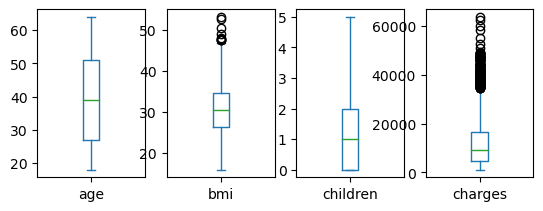

In [11]:
df.plot(kind='box',subplots=True,layout=(2,4))

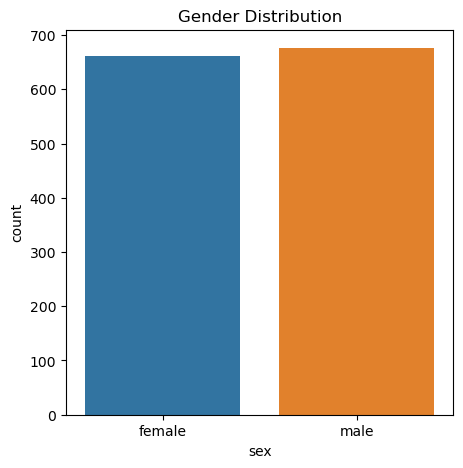

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

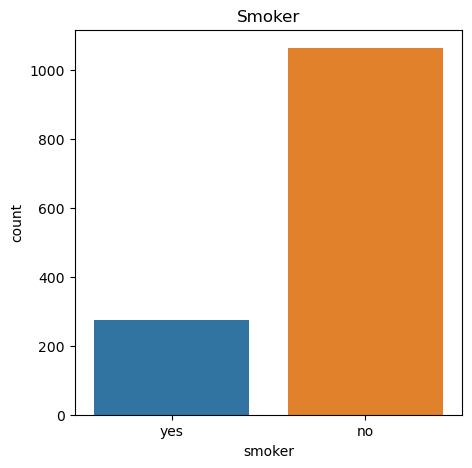

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

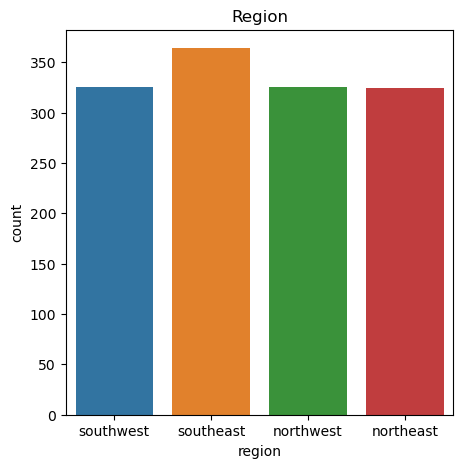

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Cost vs Region')

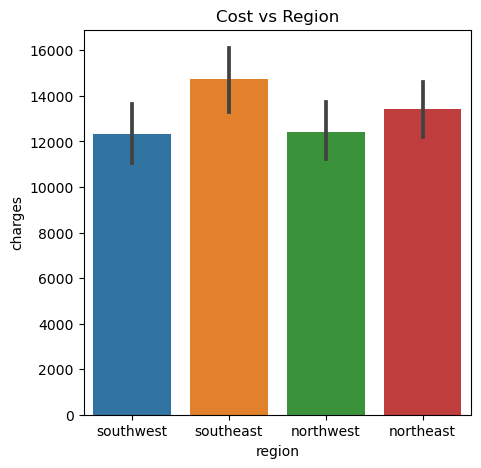

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

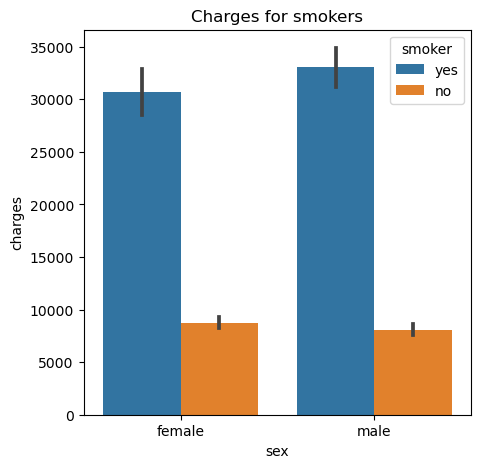

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

<AxesSubplot:xlabel='region', ylabel='charges'>

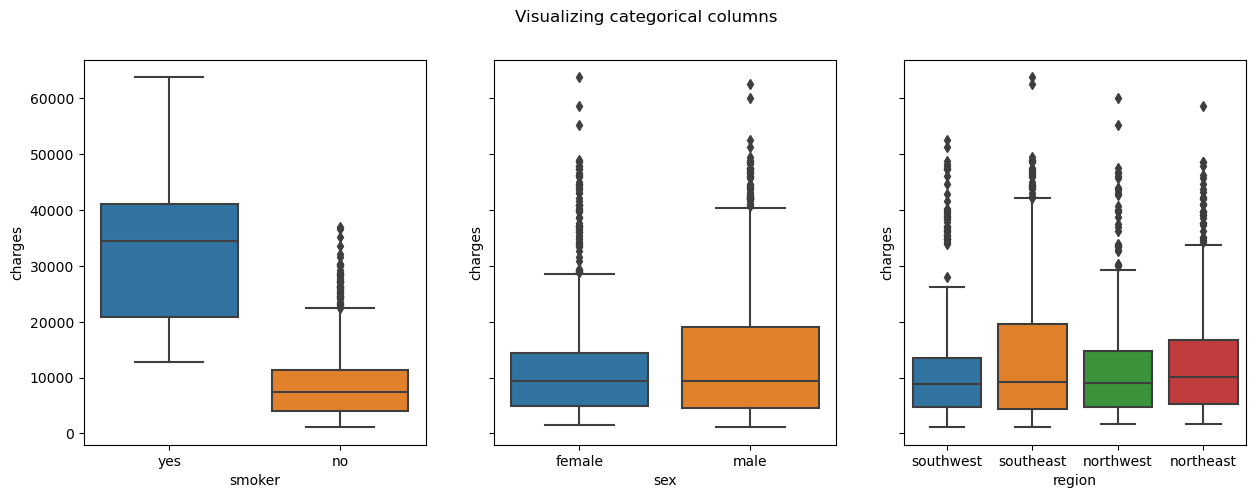

In [20]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxplot(x='region', y= 'charges', data=df, ax=axes[2])

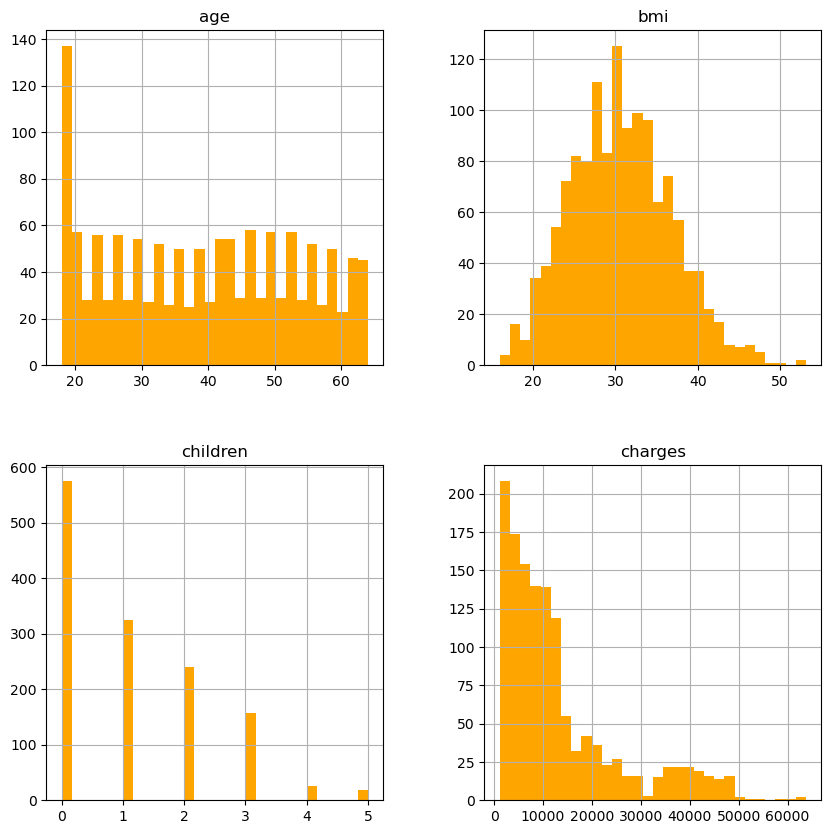

In [21]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='orange')
plt.show()

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


# <b>Correlation using heatmap</b>

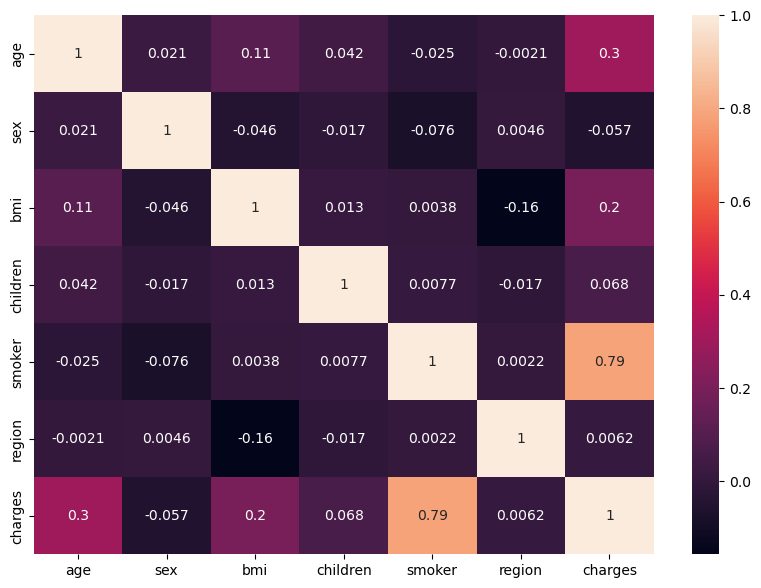

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, linecolor="black")
plt.show()

# OUTLIER


In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [27]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [28]:
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317]),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2]))

In [29]:
print("Old DataFrame", df.shape)
print("New DataFrame", df_new_z.shape)
print("total_dropped_rows", df.shape[0] - df_new_z.shape[0])

Old DataFrame (1338, 7)
New DataFrame (1309, 7)
total_dropped_rows 29


In [30]:
loss_percent = (1338-1309)/1339*100
print(loss_percent, '%')

2.165795369678865 %


# Separating the data

In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 6)
X_test shape:  (402, 6)
y_train shpae:  (936,)
y_test shape:  (402,)


# Linear Regression

In [33]:
linreg = LinearRegression()

In [34]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [35]:
from sklearn.metrics import r2_score

In [36]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7694415927057694


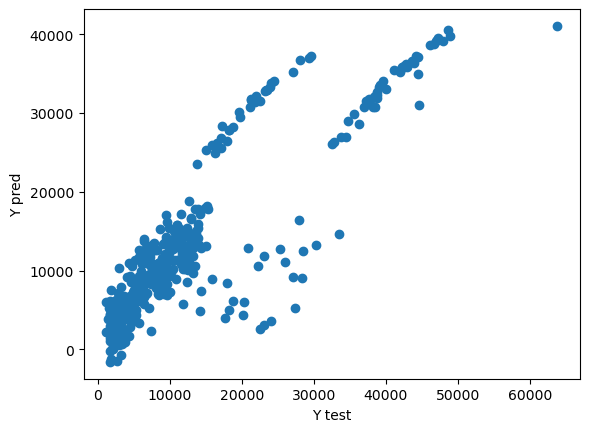

In [37]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [38]:
data = {'age':19,'sex':1, 'bmi':27.900, 'children':0, 'smoker':1, 'region':1}
index=[0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,1,1


In [39]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is:- ",cost_pred)

The medical insurance cost of the new customer is:-  [24860.7122057]


# MODEL SAVING

In [40]:
import joblib

filename ='insurance_pre.pkl'
joblib.dump(cust_df, open(filename, 'wb'))